In [1]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

<class 'numpy.ndarray'> 22050


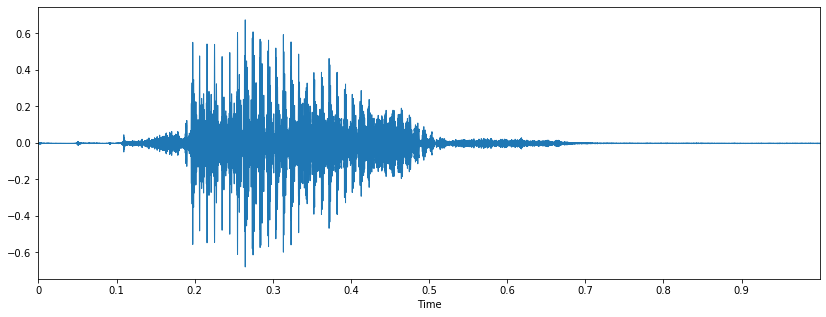

In [5]:
audio_path = '../data/five/0a2b400e_nohash_0.wav'
x , sr = librosa.load(audio_path)
print(type(x), (sr))
librosa.load(audio_path, sr=sr)

ipd.Audio(audio_path)

#display waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)



(22050,)


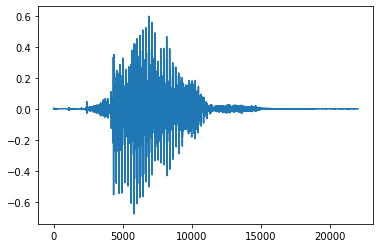

In [10]:
print(x.shape)
plt.plot(x)

(20, 101)


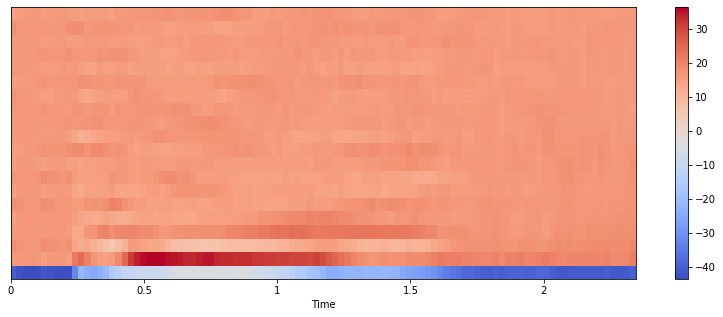

In [12]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

#MFCCS

mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20,hop_length=int(0.010*sr), n_fft=int(0.025*sr))
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')